Note: this notebook is set up to run with the env.yml containing the name 'polaris_datasets'

## Background
This is part of a release of experimental data determined at AstraZeneca on a set of compounds in the following assays: pKa, lipophilicity (LogD7.4), aqueous solubility, plasma protein binding (human, rat, dog , mouse and guinea pig), intrinsic clearance (human liver microsomes, human and rat hepatocytes). 

## Assay Information
Aqueous solubility is one of the most important properties in drug discovery, as it has profound impact on various drug properties, including biological activity, pharmacokinetics (PK), toxicity, and in vivo efficacy. Both kinetic and thermodynamic solubilities are determined during different stages of drug discovery and development. One way of assessing solubility is as follows:

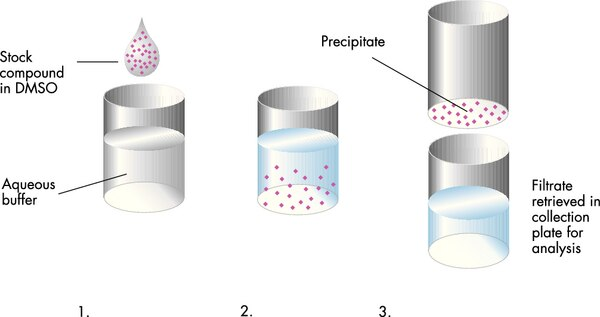

Image is from [here](https://www.emdmillipore.com/CA/en/product/MultiScreenHTS-PCF-Filter-Plates-for-Solubility-Assays,MM_NF-C8875?ReferrerURL=https%3A%2F%2Fwww.google.com%2F).


## Description of readout:
- **SOLUBILITY_74**: Solubility in pH7.4 buffer using solid starting material using the method described in J. Assoc. Lab. Autom. 2011, 16, 276-284.

## Data resource

**Reference**: https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL3301361/

**Raw data**: https://www.ebi.ac.uk/chembl/assay_report_card/CHEMBL3301364/

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import datamol as dm

from polaris import curation
from polaris.curation.viz_utils import (
    visualize_distribution,
    detailed_distributions_plots,
    verify_stereoisomers,
    visualize_chemspace,
)
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.utils.types import HubOwner

import tempfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We can get the dataset directly from ChEMBL (https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL3301361/ gives the overall experimental data information, and subsequent numbers give data for a specific endpoint). The following map gives information on each:

In [3]:
# chembl_map = {
#     'CHEMBL3301362' : 'Most basic pKa value (pKa B1)', # 261
#     'CHEMBL3301363' : 'Octan-1-ol/water (pH7.4) distribution coefficent', # 4200
#     'CHEMBL3301364' : 'Solubility in pH7.4 buffer', #1763
#     'CHEMBL3301365' : '\% bound to plasma by equilibrium dialysis, human plasma', # PPB # 1614
#     'CHEMBL3301366' : '\% bound to plasma by equilibrium dialysis, rat plasma', # 717
#     'CHEMBL3301367' : '\% bound to plasma by equilibrium dialysis, dog plasma', # 244
#     'CHEMBL3301368' : '\% bound to plasma by equilibrium dialysis, mouse plasma', # 162
#     'CHEMBL3301369' : '\% bound to plasma by equilibrium dialysis, guinea pig plasma', # 91
#     'CHEMBL3301370' : 'Intrinsic clearance measured in human liver microsomes', #1102,
#     'CHEMBL3301371' : 'Intrinsic clearance measured in rat hepatocytes', # 837
#     'CHEMBL3301372' : 'Intrinsic clearance measured in human hepatocytes', # 408
# }

In [4]:
# load data
data = pd.read_parquet(
    "gs://polaris-public/data/raw/AstraZeneca/CHEMBL3301364_raw.parquet"
)
data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,14759455,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3
1,None,None,14759456,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3
2,None,None,14759457,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,83.2
3,None,None,14759458,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,83.2
4,None,None,14759459,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,83.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,None,None,14770631,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3
1759,None,None,14770632,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3
1760,None,None,14770633,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3
1761,None,None,14770634,[],CHEMBL3301364,ASTRAZENECA: Solubility in pH7.4 buffer using ...,P,None,None,BAO_0002135,...,None,No relevant target,None,None,None,Solubility,uM,UO_0000065,None,81.3


If we look at the columns in this raw dataframe, we see there are a lot of columns that we don't need. We will focus only on necessary columns below.

In [5]:
print(data.columns)

columns_to_keep = [
    "canonical_smiles",
    "standard_value",
]
data = data[columns_to_keep].copy()

# Convert the readout to numeric values
data["standard_value"] = pd.to_numeric(data["standard_value"])

# Rename columns
data = data.rename(
    columns={
        "canonical_smiles": "SMILES",
        "standard_value": "SOLUBILITY_74",
    }
)

data

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')


,SMILES,SOLUBILITY_74
0,O=C(O)c1cc2cc(Cl)ccc2n1Cc1ccc(Cl)c(Cl)c1,81300.0
1,COc1cc(OC2CNC2)ccc1Nc1ncc(Cl)c(-c2cnc3ccccn23)n1,81300.0
2,CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2,83200.0
3,Nc1nc(-c2ccc(Cl)cc2)cs1,83200.0
4,CC(C)c1ccc2[nH]c3c(c2c1)CN(C(=O)[C@@H]1CCCC[C@...,83200.0
...,...,...
1758,Cn1cc(C(=O)NC[C@@H](O)CN2CCC(Oc3ccc(Cl)c(Cl)c3...,81300.0
1759,Cc1cccc(NS(=O)(=O)c2cccc3nonc23)c1,81300.0
1760,CCCSc1ncccc1C(=O)NC1CCCCC1,81300.0
1761,Cc1ccc(C(=O)Oc2ccc(C(O)CNC(C)(C)C)cc2OC(=O)c2c...,81300.0


Typically, logS for aqueous solubility is used to access solubility because it provides a more practical and standardized approach for dealing with solubility data across various chemical compounds and experimental conditions. 

Therefore, we will convert the solubility (nM) to logS (uM). 

In [6]:
data["logS_74"] = data["SOLUBILITY_74"].apply(lambda x: -1 * np.log10(x / 1000))

In [7]:
# Define data column names
endpoints = ["SOLUBILITY_74", "logS_74"]
data_cols = endpoints
mol_col = "SMILES"

### Run preliminary curation for data inspection

In [8]:
# preliminary curation for data inspection
curator = curation.MolecularCurator(
    data=data,
    data_cols=data_cols,
    data_types=["continuous"] * 2,
    mol_col=mol_col,
    mask_stereo_undefined_mols=False,
    keep_all_rows=True,
    class_thresholds={"logS_74": {"thresholds": [-2], "label_order": "ascending"}},
)
data_look = curator()

2024-04-15 14:22:05.181 | WARNING  | polaris.curation._data_curator:check_outliers:201 - Detected 69 outliers for data column SOLUBILITY_74 using zscore. Please revise the data and consider remove the outliers. 
/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris/polaris/curation/_data_curator.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data[NO_STEREO_UNIQUE_ID].isin(mol_with_cliff), f"{data_col}_stereo_cliff"] = True
/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris/polaris/curation/_data_curator.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data[NO_STEREO_UNIQUE_ID].isin(mol_with_cliff), f"{data_col}_stereo_cliff"] =

The curation detected 69 outliers in the data. Let's take a look at the distribution.

In [9]:
# Distribution plot of all related readouts
from polaris.curation.readouts import detailed_distributions_plots

fig = detailed_distributions_plots(
    df=data_look[["logS_74"]], thresholds={"logS_74": (-2, np.greater)}
)

ModuleNotFoundError: No module named 'polaris.curation.readouts'

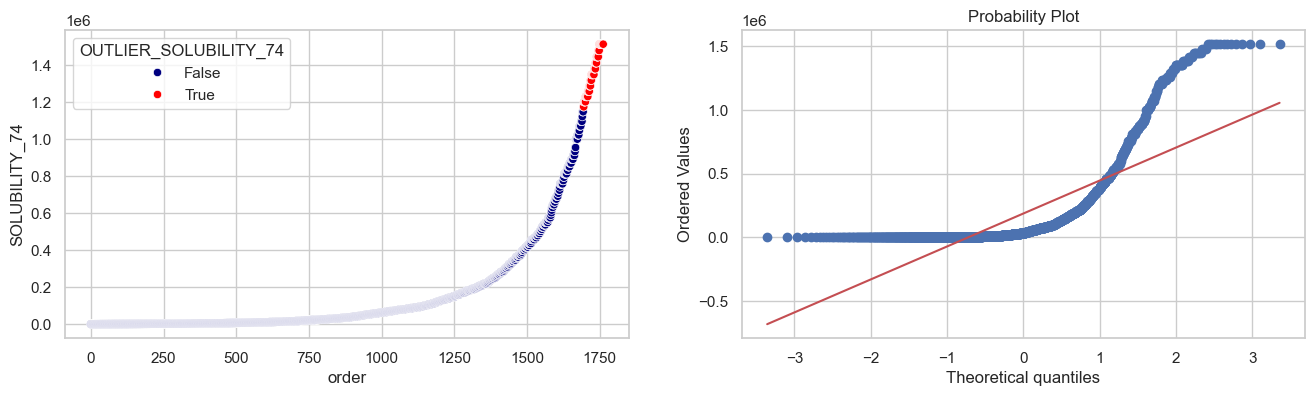

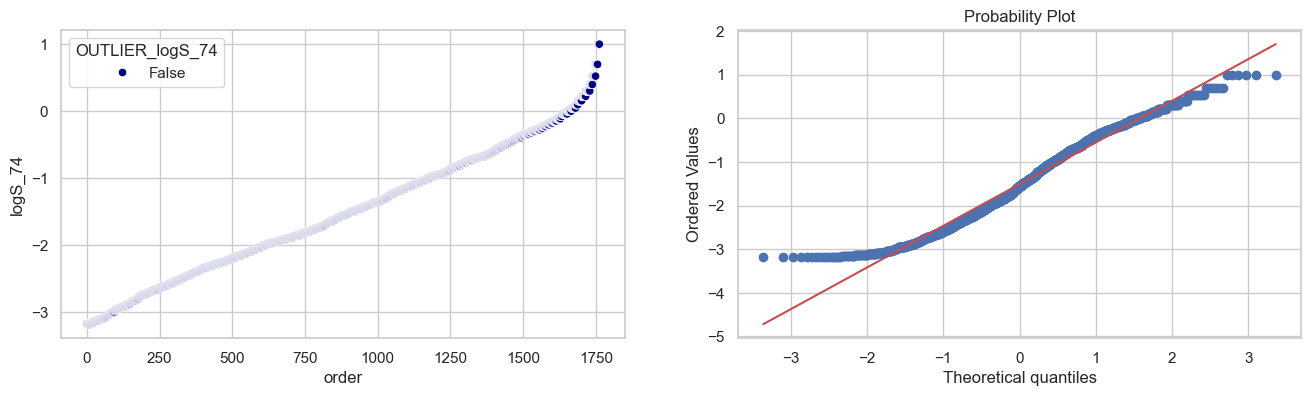

In [ ]:
visualize_distribution(dataset=data_look, data_cols=data_cols);

The flagged outliers are likely false outliers as they are located on the end of the data distribution.

### Check activity shift between stereoisomers

In [ ]:
data_look["CLASS_logS_74_stereo_cliff"].sum()

17

Activity shifts were detected in the dataset. Let's identify them for later removal.

In [61]:
data_look.query("CLASS_logS_74_stereo_cliff ==True").sort_values("molhash_id_no_stereo")

,SMILES,SOLUBILITY_74,logS_74,ORIGINAL_SOLUBILITY_74,ORIGINAL_logS_74,ORIGINAL_SMILES,smiles,molhash_id,molhash_id_no_stereo,num_stereo_center,...,num_stereoisomers,num_undefined_stereoisomers,undefined_E_D,undefined_E/Z,OUTLIER_SOLUBILITY_74,OUTLIER_logS_74,CLASS_logS_74,SOLUBILITY_74_zscore,SOLUBILITY_74_stereo_cliff,CLASS_logS_74_stereo_cliff
30,CC(C)Oc1cc(O[C@@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C...,89100.0,-1.949878,89100.0,-1.949878,CC(C)Oc1cc(O[C@@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C...,CC(C)Oc1cc(O[C@@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C...,23a22d5dbc846ae16dbb71c3a423bf2c82d99627,328096cc75c253c9df413c7773c91b0f5aa17416,1,...,2,1,False,False,False,False,1.0,1.020433,NaN,True
93,CC(C)Oc1cc(O[C@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C(...,112200.0,-2.049993,112200.0,-2.049993,CC(C)Oc1cc(O[C@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C(...,CC(C)Oc1cc(O[C@H](C)c2ccccc2)cc(C(=O)Nc2ccc(C(...,caab342f0236d042e0cc936311241e90f38fda49,328096cc75c253c9df413c7773c91b0f5aa17416,1,...,2,1,False,False,False,False,0.0,1.466872,NaN,True
19,C[C@H](NC1=NC(=O)[C@](C)(C(F)(F)F)S1)c1ccccc1F,87100.0,-1.940018,87100.0,-1.940018,C[C@H](NC1=NC(=O)[C@](C)(C(F)(F)F)S1)c1ccccc1F,C[C@H](NC1=NC(=O)[C@](C)(C(F)(F)F)S1)c1ccccc1F,74dcb873dfb854128fc7c00f5feec08bcb02ca00,72367012f92bd76dc4781b3d9c5bfcdccf118668,2,...,4,1,False,False,False,False,1.0,0.981780,True,True
368,C[C@H](NC1=NC(=O)C(C)(C(F)(F)F)S1)c1ccccc1F,338800.0,-2.529943,338800.0,-2.529943,C[C@H](NC1=NC(=O)C(C)(C(F)(F)F)S1)c1ccccc1F,C[C@H](NC1=NC(=O)C(C)(C(F)(F)F)S1)c1ccccc1F,480990590859b5f132c604683a45478698ce200c,72367012f92bd76dc4781b3d9c5bfcdccf118668,2,...,4,2,False,False,False,False,0.0,5.846231,True,True
273,C[C@H](NC1=NC(=O)[C@@](C)(C(F)(F)F)S1)c1ccccc1F,218800.0,-2.340047,218800.0,-2.340047,C[C@H](NC1=NC(=O)[C@@](C)(C(F)(F)F)S1)c1ccccc1F,C[C@H](NC1=NC(=O)[C@@](C)(C(F)(F)F)S1)c1ccccc1F,a113b9651c8d25ea14fc9d4a101060c3badefd63,72367012f92bd76dc4781b3d9c5bfcdccf118668,2,...,4,1,False,False,False,False,0.0,3.527065,True,True
224,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,186200.0,-2.269980,186200.0,-2.269980,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,f47ba66990f679f442ad7073a387476a39daf904,a42f41ec4838fe42b901c794265d1113cad19f92,2,...,4,2,False,False,False,False,0.0,2.897025,True,True
1278,O=C(N[C@@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2...,10700.0,-1.029384,10700.0,-1.029384,O=C(N[C@@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2...,O=C(N[C@@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2...,437670944ff273e3b2df831cf636c7885afda269,a42f41ec4838fe42b901c794265d1113cad19f92,2,...,4,1,False,False,False,False,1.0,-0.494755,True,True
1316,O=C(N[C@@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2c...,12300.0,-1.089905,12300.0,-1.089905,O=C(N[C@@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2c...,O=C(N[C@@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2c...,388e9538d2312283390f990099b98db52a8c4a59,a42f41ec4838fe42b901c794265d1113cad19f92,2,...,4,1,False,False,False,False,1.0,-0.463833,True,True
1377,O=C(N[C@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2cc...,16200.0,-1.209515,16200.0,-1.209515,O=C(N[C@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2cc...,O=C(N[C@H]1Cc2ccccc2N(C[C@H](O)CO)C1=O)c1cc2cc...,48d52d7c1d40e73d73ba32bb98eacdd8993960ca,a42f41ec4838fe42b901c794265d1113cad19f92,2,...,4,1,False,False,False,False,1.0,-0.388460,True,True
1554,O=C(N[C@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2c...,35500.0,-1.550228,35500.0,-1.550228,O=C(N[C@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2c...,O=C(N[C@H]1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2c...,61638dd0483598dc858842432e164b11c4db8840,a42f41ec4838fe42b901c794265d1113cad19f92,2,...,4,1,False,False,False,False,1.0,-0.015461,True,True


2024-04-15 14:22:17.222 | INFO     | polaris.curation.viz_utils:verify_stereoisomers:73 - Verify the stereo ismomers for readout `CLASS_logS_74`
/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris/polaris/curation/viz_utils.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: "\n".join([f"{fig_col}: {x[i]}" for i, fig_col in enumerate(fig_cols)]),


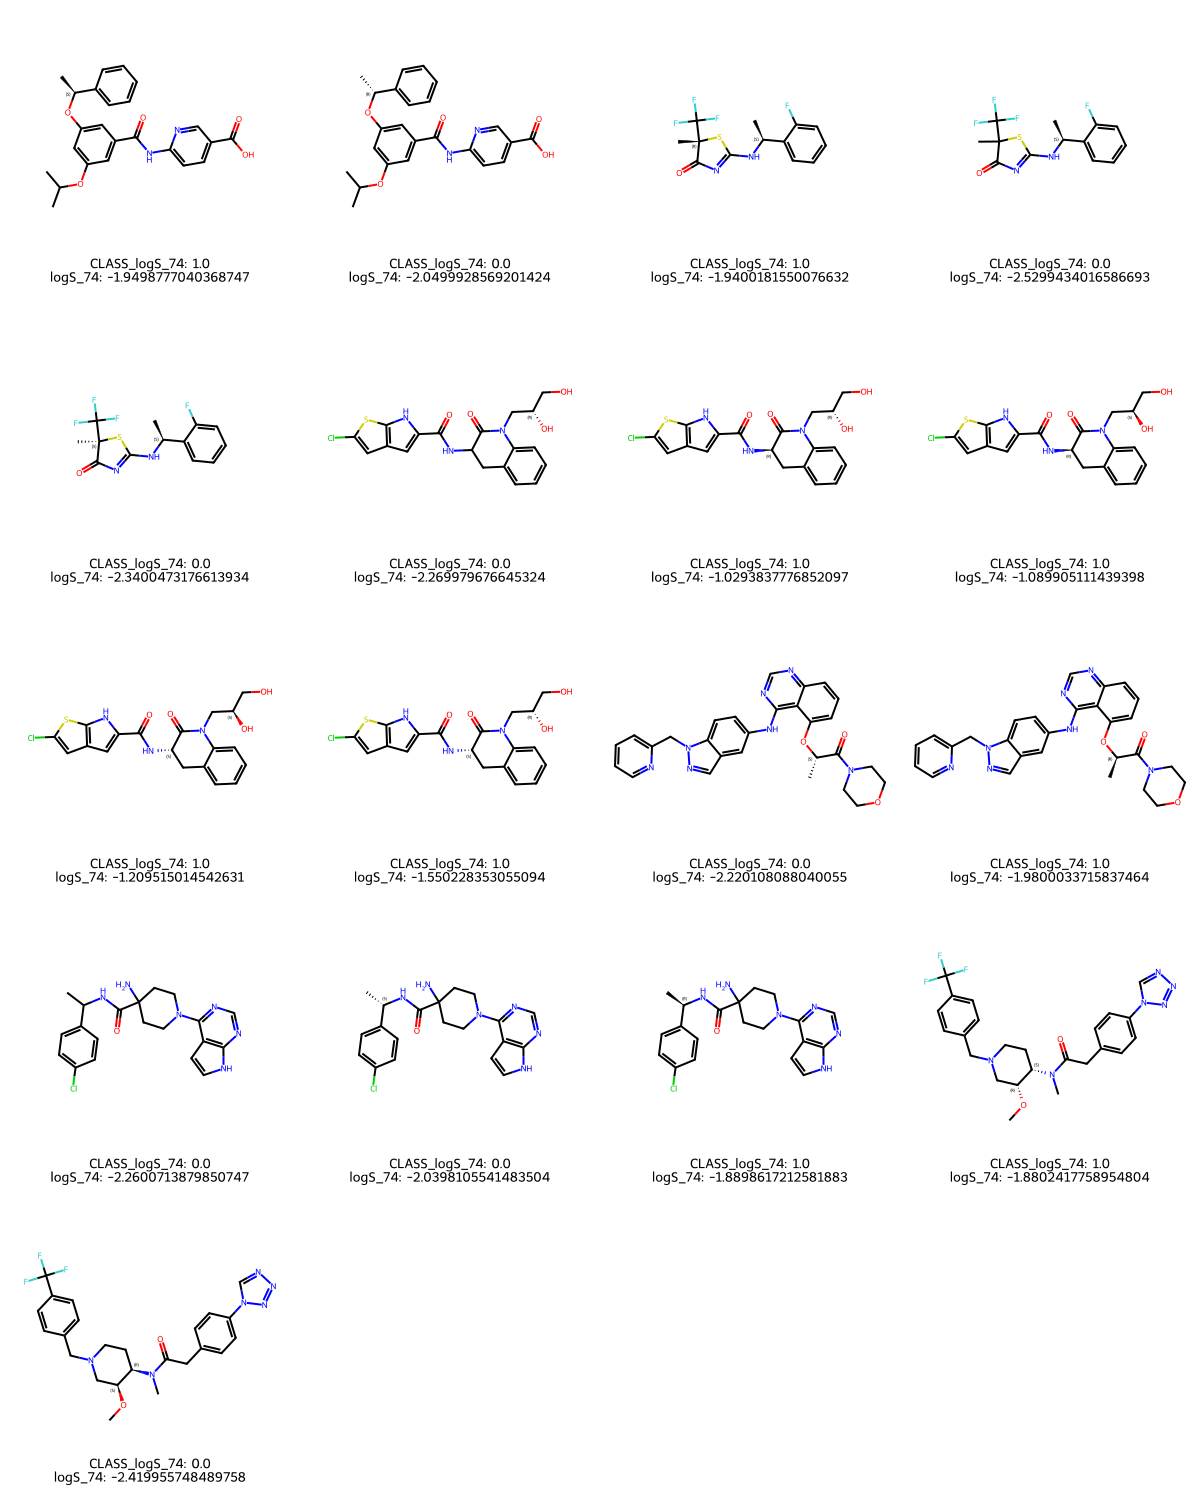

In [10]:
figs = verify_stereoisomers(
    data_cols=["CLASS_logS_74"],
    dataset=data_look,
    mol_col=mol_col,
    legend_cols=["logS_74"],
)
figs[0]

This dataset include many stereoisomers. The above activity cliffs were determined based on a hard threshold value -2. However, the `logS` values are rather close. Given this dataset will mainly serve for regression tasks, all the molecules will be kept in the dataset. 

### Re-run curation, removing molecules as needed

In [12]:
### Re-run the curation steps, this time removing molecules with undefined stereoisomers and removing duplicates
curator_with_stereo = curation.MolecularCurator(
    data=data,
    data_cols=data_cols,
    mol_col=mol_col,
    # remove all the molecule rows including the duplicates
    keep_all_rows=False,
)

print(f"size before curation: {len(data)}")
data_curated = curator_with_stereo()
print(f"size after curation: {len(data_curated)}")

size before curation: 1763


2024-04-15 14:22:41.020 | WARNING  | polaris.curation._data_curator:run_data_curation:233 - Data types are not provides. We will try our best to determine the types
2024-04-15 14:22:41.022 | INFO     | polaris.curation._data_curator:check_outliers:188 - Outlier detection is omit for categorical data SOLUBILITY_74.


size after curation: 1763


/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris/polaris/curation/_data_curator.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data[NO_STEREO_UNIQUE_ID].isin(mol_with_cliff), f"{data_col}_stereo_cliff"] = True
/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris/polaris/curation/_data_curator.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data[NO_STEREO_UNIQUE_ID].isin(mol_with_cliff), f"{data_col}_stereo_cliff"] = True


According to best practices suggested in a [recent paper on solubility determination](https://www.nature.com/articles/s41597-024-03105-6), we would want to follow this decision tree:

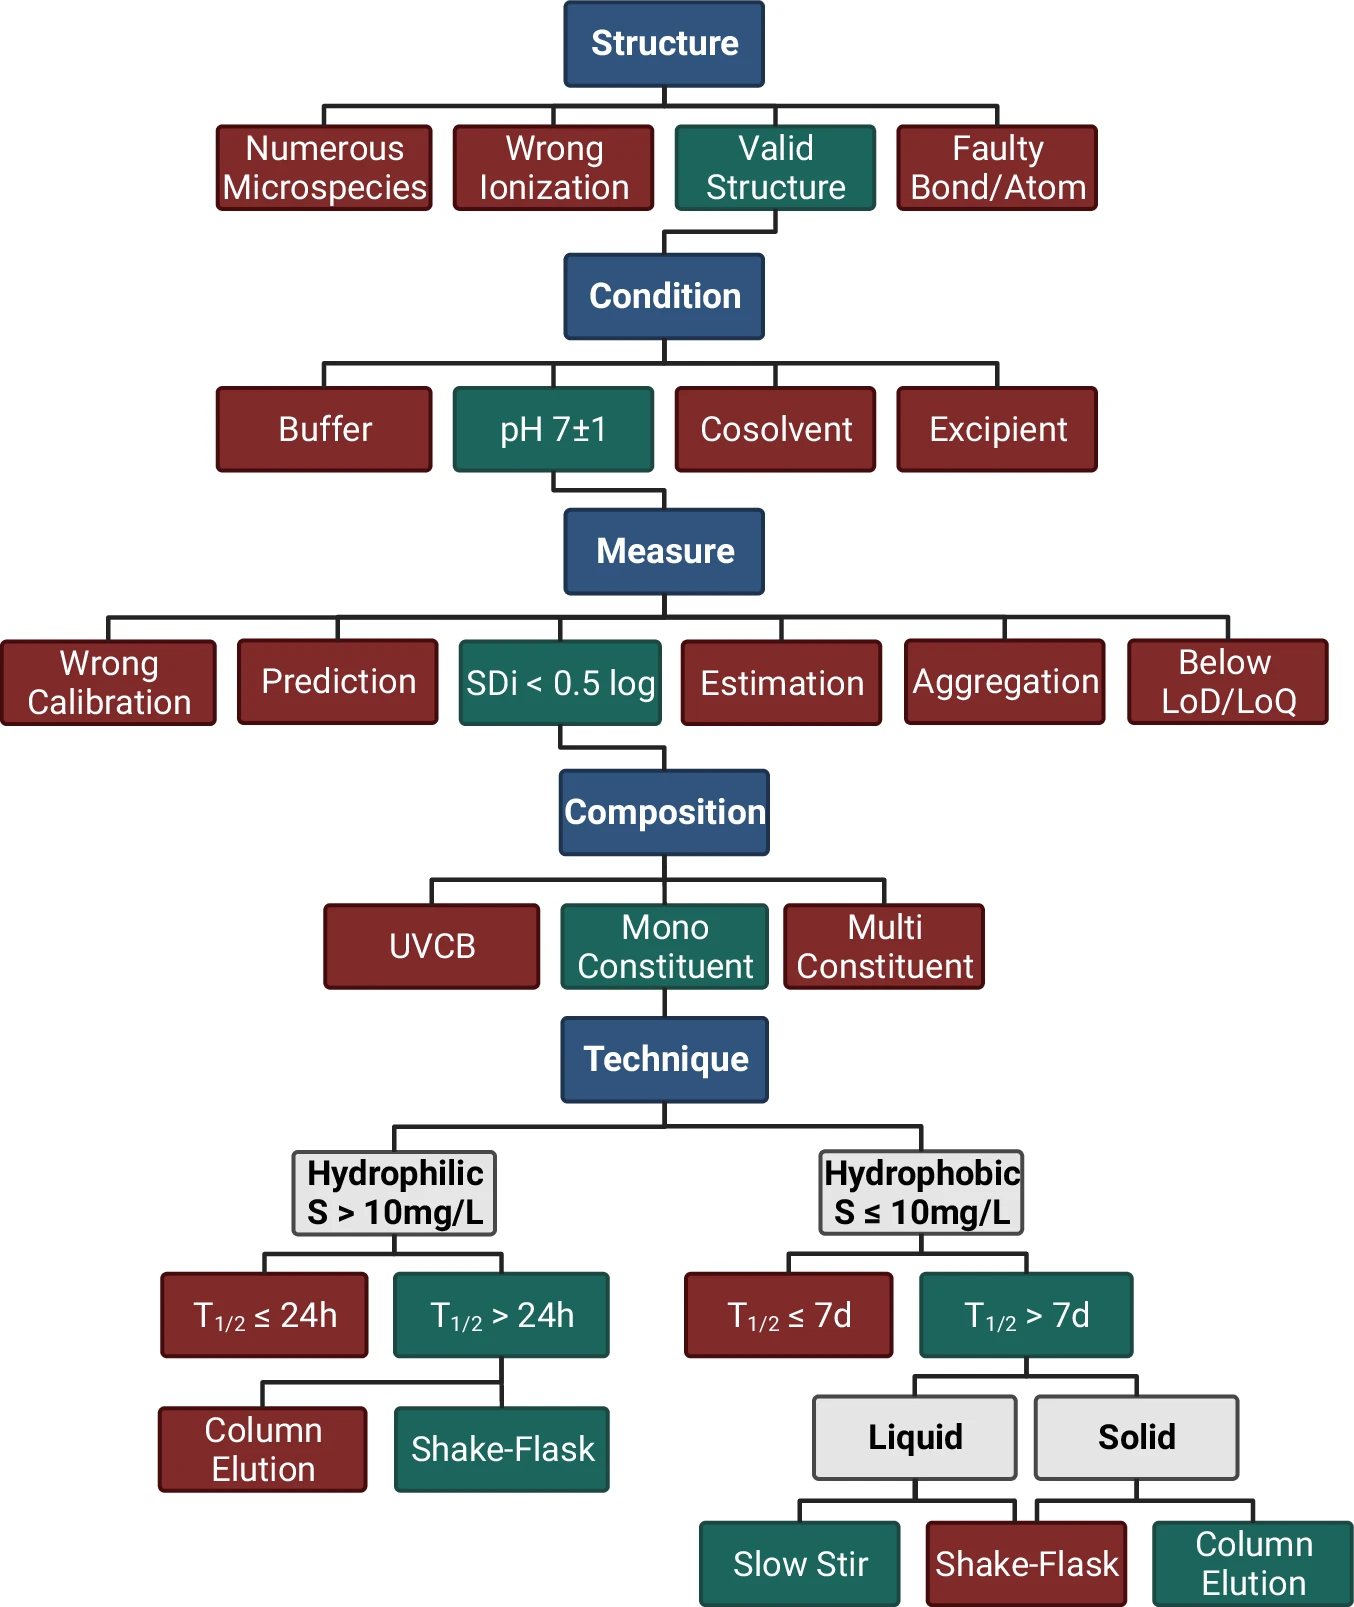

We filtered for valid structures with the curation process, the dataset is measured at pH close to 7, we do not have the standard deviation (unfortunately), and each sample was run as one constituent. Because we have not assigned a classification of hydrophilic or hydrophobic we will not progress down the tree, but if you are using this dataset for a classification task please keep in mind that S > 10 mg/L should be considered hydrophilic and below that is hydrophobic.

In [13]:
# Additional meta-data on the column level
annotations = {
    "smiles": ColumnAnnotation(
        description="Molecule SMILES string", modality="molecule"
    ),
    "SOLUBILITY_74": ColumnAnnotation(
        description="Solubility in pH7.4 buffer using solid starting material.",
        user_attributes={"PH": "7.4", "Unit": "nM"},
    ),
    "logS_74": ColumnAnnotation(
        description="Logarithm of aqueous solubility (log S) based on solubility in pH7.4 buffer using solid starting material.",
        user_attributes={"PH": "7.4", "Unit": "uM"},
    ),
}

In [14]:
dataset = Dataset(
    # The table is the core data-structure required to construct a dataset
    table=data_curated,
    # Additional meta-data on the dataset level.
    name="AstraZeneca_Solubility_74",
    description="Solubility in pH7.4 buffer experiment data released by AstraZeneca",
    source="https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL3301364/",
    annotations=annotations,
    tags=["ADME"],
    owner=HubOwner(user_id="Polaris", slug="polaris"),
    license="CC-BY-SA-4.0",
    user_attributes={"year": "2016"},
    curation_reference="https://github.com/polaris-hub/polaris-recipes/06_AstraZeneca/06_02_AZ_Solubility_data_curation.ipynb",
)

In [15]:
# Make a temporary directory to save the dataset
temp_dir = tempfile.TemporaryDirectory().name

save_dir = dm.fs.join(temp_dir, "dataset")

path = dataset.to_json(save_dir)

# Look at the save destination
fs = dm.fs.get_mapper(save_dir).fs
fs.ls(save_dir)

['/var/folders/_7/ffxc1f251dbb5msn977xl4sm0000gr/T/tmp5oeinmoc/dataset/table.parquet',
 '/var/folders/_7/ffxc1f251dbb5msn977xl4sm0000gr/T/tmp5oeinmoc/dataset/dataset.json']

In [16]:
folder = "06_AstraZeneca"
data_curated.to_parquet(
    f"gs://polaris-private/curated_datasets/{folder}/{dataset.name}_curated.parquet"
)  # Save just in case. Requires a data folder.

save_dir = f"gs://polaris-private/Datasets/{folder}/{dataset.name}"
dataset.to_json(save_dir)

save_dir = f"gs://polaris-public/Datasets/{folder}/{dataset.name}"
dataset.to_json(save_dir)

# dataset.upload_to_hub()

/Users/lu.zhu/miniconda3/envs/polaris_datasets/lib/python3.12/site-packages/pydantic/main.py:314: UserWarning: Pydantic serializer warnings:
  Expected `url` but got `str` - serialized value may not be as expected
  Expected `url` but got `str` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


'gs://polaris-public/Datasets/06_AstraZeneca/AstraZeneca_Solubility_74/dataset.json'